In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing all required libraries 

In [2]:
os.getcwd()

'C:\\Users\\admin\\Mojotics\\EDA'

In [3]:
os.chdir('E:\\data science\\Mojotics\\Guide\\C7\\Statistics\\Topic 2 - Logistics Regression')

Reading data

In [4]:
Odata = pd.read_csv('GermanCredit.csv')

Sanity checks

In [5]:
Odata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
Duration                                  1000 non-null int64
Amount                                    1000 non-null int64
InstallmentRatePercentage                 1000 non-null int64
ResidenceDuration                         1000 non-null int64
Age                                       1000 non-null int64
NumberExistingCredits                     1000 non-null int64
NumberPeopleMaintenance                   1000 non-null int64
Telephone                                 1000 non-null int64
ForeignWorker                             1000 non-null int64
Class                                     1000 non-null object
CheckingAccountStatus.lt.0                1000 non-null int64
CheckingAccountStatus.0.to.200            1000 non-null int64
CheckingAccountStatus.gt.200              1000 non-null int64
CheckingAccountStatus.none                1000 non-null int64
CreditHistory.NoCredit.Al

###### By looking above results other than class variable everything is in numerical format only and we don't have any null values in the data

In [6]:
Odata.shape

(1000, 62)

In [7]:
Odata.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


###### If we observe data e have so many categorical variables in our data. We will combine those columns and try to find patterns.

In [8]:
list(Odata)

['Duration',
 'Amount',
 'InstallmentRatePercentage',
 'ResidenceDuration',
 'Age',
 'NumberExistingCredits',
 'NumberPeopleMaintenance',
 'Telephone',
 'ForeignWorker',
 'Class',
 'CheckingAccountStatus.lt.0',
 'CheckingAccountStatus.0.to.200',
 'CheckingAccountStatus.gt.200',
 'CheckingAccountStatus.none',
 'CreditHistory.NoCredit.AllPaid',
 'CreditHistory.ThisBank.AllPaid',
 'CreditHistory.PaidDuly',
 'CreditHistory.Delay',
 'CreditHistory.Critical',
 'Purpose.NewCar',
 'Purpose.UsedCar',
 'Purpose.Furniture.Equipment',
 'Purpose.Radio.Television',
 'Purpose.DomesticAppliance',
 'Purpose.Repairs',
 'Purpose.Education',
 'Purpose.Vacation',
 'Purpose.Retraining',
 'Purpose.Business',
 'Purpose.Other',
 'SavingsAccountBonds.lt.100',
 'SavingsAccountBonds.100.to.500',
 'SavingsAccountBonds.500.to.1000',
 'SavingsAccountBonds.gt.1000',
 'SavingsAccountBonds.Unknown',
 'EmploymentDuration.lt.1',
 'EmploymentDuration.1.to.4',
 'EmploymentDuration.4.to.7',
 'EmploymentDuration.gt.7',
 'Emp

In [9]:
data = Odata.copy()

In [10]:
data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [11]:
for i in data.index:
    if(data.loc[i,'CheckingAccountStatus.lt.0']==1):
        data.loc[i,'CheckingAccountStatus'] = 'lt.0'
    elif(data.loc[i,'CheckingAccountStatus.0.to.200'] == 1):
        data.loc[i,'CheckingAccountStatus'] = '0.to.200'
    elif(data.loc[i,'CheckingAccountStatus.gt.200'] == 1):
        data.loc[i,'CheckingAccountStatus'] = 'gt.200'
    elif(data.loc[i,'CheckingAccountStatus.none'] == 1):
        data.loc[i,'CheckingAccountStatus'] = 'none'
    else:
        data.loc[i,'CheckingAccountStatus'] = 0

In [12]:
data['CheckingAccountStatus'].value_counts()

none        394
lt.0        274
0.to.200    269
gt.200       63
Name: CheckingAccountStatus, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
Duration                                  1000 non-null int64
Amount                                    1000 non-null int64
InstallmentRatePercentage                 1000 non-null int64
ResidenceDuration                         1000 non-null int64
Age                                       1000 non-null int64
NumberExistingCredits                     1000 non-null int64
NumberPeopleMaintenance                   1000 non-null int64
Telephone                                 1000 non-null int64
ForeignWorker                             1000 non-null int64
Class                                     1000 non-null object
CheckingAccountStatus.lt.0                1000 non-null int64
CheckingAccountStatus.0.to.200            1000 non-null int64
CheckingAccountStatus.gt.200              1000 non-null int64
CheckingAccountStatus.none                1000 non-null int64
CreditHistory.NoCredit.Al

In [14]:
for i in data.index:
    for column in data[['CreditHistory.NoCredit.AllPaid','CreditHistory.ThisBank.AllPaid','CreditHistory.PaidDuly','CreditHistory.Delay','CreditHistory.Critical']]:
        if(data.loc[i,column]==1):
            data.loc[i,'CreditHistory']=column.split('.',1)[1]

In [15]:
print(data['CreditHistory.Critical'].value_counts())
print(data['CreditHistory.ThisBank.AllPaid'].value_counts())

0    707
1    293
Name: CreditHistory.Critical, dtype: int64
0    951
1     49
Name: CreditHistory.ThisBank.AllPaid, dtype: int64


In [16]:
data['CreditHistory'].value_counts()

PaidDuly            530
Critical            293
Delay                88
ThisBank.AllPaid     49
NoCredit.AllPaid     40
Name: CreditHistory, dtype: int64

In [17]:
list(data)

['Duration',
 'Amount',
 'InstallmentRatePercentage',
 'ResidenceDuration',
 'Age',
 'NumberExistingCredits',
 'NumberPeopleMaintenance',
 'Telephone',
 'ForeignWorker',
 'Class',
 'CheckingAccountStatus.lt.0',
 'CheckingAccountStatus.0.to.200',
 'CheckingAccountStatus.gt.200',
 'CheckingAccountStatus.none',
 'CreditHistory.NoCredit.AllPaid',
 'CreditHistory.ThisBank.AllPaid',
 'CreditHistory.PaidDuly',
 'CreditHistory.Delay',
 'CreditHistory.Critical',
 'Purpose.NewCar',
 'Purpose.UsedCar',
 'Purpose.Furniture.Equipment',
 'Purpose.Radio.Television',
 'Purpose.DomesticAppliance',
 'Purpose.Repairs',
 'Purpose.Education',
 'Purpose.Vacation',
 'Purpose.Retraining',
 'Purpose.Business',
 'Purpose.Other',
 'SavingsAccountBonds.lt.100',
 'SavingsAccountBonds.100.to.500',
 'SavingsAccountBonds.500.to.1000',
 'SavingsAccountBonds.gt.1000',
 'SavingsAccountBonds.Unknown',
 'EmploymentDuration.lt.1',
 'EmploymentDuration.1.to.4',
 'EmploymentDuration.4.to.7',
 'EmploymentDuration.gt.7',
 'Emp

In [18]:
for i in data.index:
    for column in data[['Purpose.NewCar','Purpose.UsedCar','Purpose.Furniture.Equipment','Purpose.Radio.Television','Purpose.DomesticAppliance','Purpose.Repairs','Purpose.Education','Purpose.Vacation','Purpose.Retraining','Purpose.Business','Purpose.Other']]:
            if(data.loc[i,column]==1):
                data.loc[i,'Purpose']=column.split('.',1)[1]

In [19]:
data['Purpose'].value_counts()

Radio.Television       280
NewCar                 234
Furniture.Equipment    181
UsedCar                103
Business                97
Education               50
Repairs                 22
DomesticAppliance       12
Other                   12
Retraining               9
Name: Purpose, dtype: int64

In [20]:
print(data['Purpose.Radio.Television'].value_counts())

0    720
1    280
Name: Purpose.Radio.Television, dtype: int64


In [21]:
for i in data.index:
    for column in data[['SavingsAccountBonds.lt.100','SavingsAccountBonds.100.to.500','SavingsAccountBonds.500.to.1000','SavingsAccountBonds.gt.1000','SavingsAccountBonds.Unknown']]:
        if(data.loc[i,column]==1):
                data.loc[i,'SavingsAccountBonds']=column.split('.',1)[1]

In [22]:
data['SavingsAccountBonds'].value_counts()

lt.100         603
Unknown        183
100.to.500     103
500.to.1000     63
gt.1000         48
Name: SavingsAccountBonds, dtype: int64

In [23]:
for i in data.index:
    for column in data[['EmploymentDuration.lt.1','EmploymentDuration.1.to.4','EmploymentDuration.4.to.7','EmploymentDuration.gt.7','EmploymentDuration.Unemployed']]:
        if(data.loc[i,column]==1):
            data.loc[i,'EmploymentDuration']=column.split('.',1)[1]

for i in data.index:
    for column in data[['OtherDebtorsGuarantors.None','OtherDebtorsGuarantors.CoApplicant','OtherDebtorsGuarantors.Guarantor']]:
        if(data.loc[i,column]==1):
            data.loc[i,'OtherDebtorsGuarantors']=column.split('.',1)[1]

for i in data.index:
    for column in data[['Property.RealEstate','Property.Insurance', 'Property.CarOther', 'Property.Unknown']]:
        if(data.loc[i,column]==1):
            data.loc[i,'Property']=column.split('.',1)[1]
                
for i in data.index:
    for column in data[['OtherInstallmentPlans.Bank', 'OtherInstallmentPlans.Stores','OtherInstallmentPlans.None']]:
        if(data.loc[i,column]==1):
            data.loc[i,'OtherInstallmentPlans']=column.split('.',1)[1]
                
for i in data.index:
    for column in data[['Housing.Rent', 'Housing.Own','Housing.ForFree']]:
        if(data.loc[i,column]==1):
            data.loc[i,'Housing']=column.split('.',1)[1]
        
for i in data.index:
    for column in data[['Job.UnemployedUnskilled', 'Job.UnskilledResident','Job.SkilledEmployee', 'Job.Management.SelfEmp.HighlyQualified']]:
        if(data.loc[i,column]==1):
            data.loc[i,'Job']=column.split('.',1)[1]
        

In [24]:
for i in data.index:
    for column in data[['Personal.Male.Divorced.Seperated', 'Personal.Female.NotSingle','Personal.Male.Single', 'Personal.Male.Married.Widowed','Personal.Female.Single']]:
        if(data.loc[i,column]==1):
            data.loc[i,'Sex']=column.split('.',2)[1]
            
for i in data.index:
    for column in data[['Personal.Male.Divorced.Seperated', 'Personal.Female.NotSingle','Personal.Male.Single', 'Personal.Male.Married.Widowed','Personal.Female.Single']]:
        if(data.loc[i,column]==1):
            data.loc[i,'Marital status']=column.split('.',2)[2]

In [25]:
print(data.shape)
print(Odata.shape)

(1000, 74)
(1000, 62)


In [26]:
pd.crosstab(data.Job,[data['Job.SkilledEmployee'],data['Job.UnskilledResident']])

Job.SkilledEmployee                   0         1
Job.UnskilledResident                 0    1    0
Job                                              
Management.SelfEmp.HighlyQualified  148    0    0
SkilledEmployee                       0    0  630
UnemployedUnskilled                  22    0    0
UnskilledResident                     0  200    0

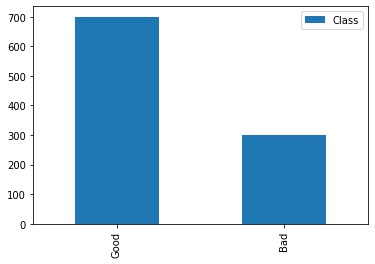

In [42]:
data.Class.value_counts().plot(kind='bar')
plt.legend()
plt.show()

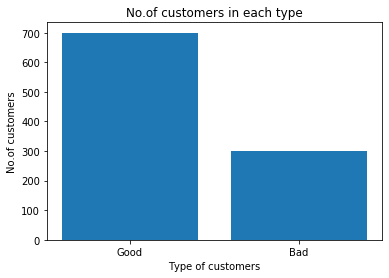

In [62]:
xpos = np.arange(data.Class.nunique())

plt.xticks(xpos,data.Class.unique())

plt.bar(xpos,data.Class.value_counts())
plt.xlabel('Type of customers')
plt.ylabel('No.of customers')
plt.title('No.of customers in each type')
plt.show()

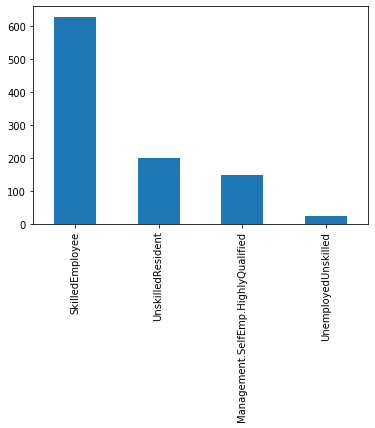

In [75]:
data.Job.value_counts().plot(kind='bar')

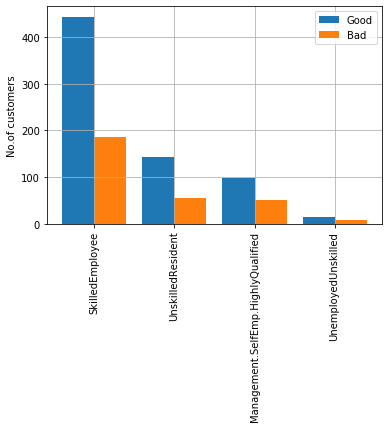

In [86]:
xpos = np.arange(data.Job.nunique())

plt.bar(xpos-0.2,data[data.Class=='Good'].Job.value_counts(),width = 0.4,label = 'Good')
plt.bar(xpos+0.2,data[data.Class=='Bad'].Job.value_counts(),width = 0.4,label = 'Bad')
plt.legend()
plt.xticks(xpos,data.Job.unique(),rotation = 90)
plt.grid()
plt.ylabel('No.of customers')
plt.show()

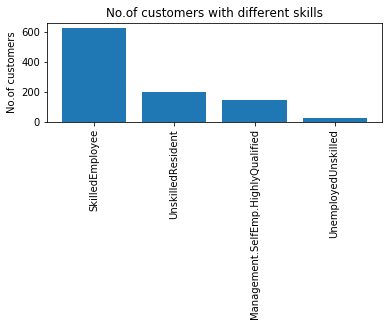

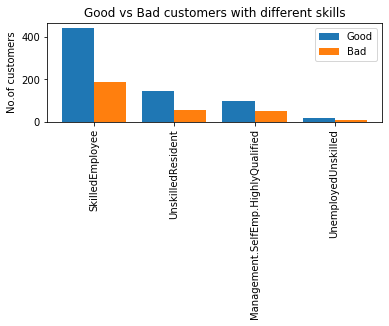

In [93]:
plt.subplot(211)
plt.bar(xpos,data.Job.value_counts())
plt.xticks(xpos,data.Job.unique(),rotation = 90)
plt.title('No.of customers with different skills')
plt.ylabel('No.of customers')
plt.show()

plt.subplot(212)
plt.bar(xpos-0.2,data[data.Class=='Good'].Job.value_counts(),width = 0.4,label = 'Good')
plt.bar(xpos+0.2,data[data.Class=='Bad'].Job.value_counts(),width = 0.4,label = 'Bad')
plt.legend()
plt.xticks(xpos,data.Job.unique(),rotation = 90)
plt.title('Good vs Bad customers with different skills')
plt.ylabel('No.of customers')
plt.show()